In [59]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
f = open("assets.txt", "r")
assets = [str(l).strip() for l in f]

In [61]:
t = open("token.txt", "r")
token = t.readline().strip()

FileNotFoundError: [Errno 2] No such file or directory: 'token.txt'

In [19]:
params = {"symbol": assets[0], "sort": "newest", "api_token":token}
url = "https://www.worldtradingdata.com/api/v1/history"
r = requests.get(url, params=params)

In [66]:
d = {"dates": list(r.json()['history'].keys())}

In [67]:
def getClosingVals(a, r):
    a = []
    for v in r.json()['history'].values():
        a.append(v['close'])
    return a

In [73]:
for a in assets:
    params = {"symbol": a, "sort": "newest", "api_token":token}
    url = "https://www.worldtradingdata.com/api/v1/history"
    r = requests.get(url, params=params)
    if "history" in r.json():
        d[a] = getClosingVals(a, r)
    else:
        print(a)

VUSXX


In [6]:
df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))

NameError: name 'd' is not defined

In [109]:
l = pd.date_range(end=pd.datetime.today().date(), periods=df.shape[0]).tolist()
l.reverse()
df['dates'] = l


In [119]:
df.to_csv("./data/data.csv")

In [16]:
pd.read_csv("./data/data.csv")

,Unnamed: 0,dates,VTSMX,VFINX,VIVAX,VIMSX,VMVIX,NAESX,VISVX,VDAIX,...,GLD,PCRIX,EMB,PIGLX,VICSX,VBMFX,VIPSX,VWITX,VFSTX,VFISX
0,0,2019-05-17,71.63,266.13,42.40,44.54,42.83,74.12,31.26,44.76,...,121.51,6.03,109.21,8.92,23.48,10.70,12.94,14.30,10.61,10.52
1,1,2019-05-16,70.99,263.70,42.05,44.18,42.56,73.58,31.09,44.37,...,122.39,5.98,109.19,8.94,23.50,10.71,12.96,14.29,10.62,10.53
2,2,2019-05-15,70.58,262.12,41.96,44.00,42.49,73.32,31.05,44.22,...,122.46,5.95,108.79,8.93,23.44,10.69,12.94,14.28,10.61,10.52
3,3,2019-05-14,69.95,260.01,41.69,43.54,42.13,72.44,30.73,43.94,...,122.67,5.87,108.45,8.93,23.45,10.70,12.93,14.27,10.61,10.52
4,4,2019-05-13,71.75,266.43,42.55,44.68,43.16,74.69,31.61,44.78,...,121.43,5.89,109.33,8.95,23.38,10.67,12.89,14.26,10.60,10.51
5,5,2019-05-12,71.48,265.35,42.30,44.53,42.98,74.52,31.51,44.48,...,121.20,5.87,108.96,8.93,23.41,10.68,12.87,14.25,10.60,10.51
6,6,2019-05-11,71.66,266.07,42.39,44.57,43.03,74.70,31.58,44.51,...,120.91,5.90,109.29,8.92,23.38,10.66,12.85,14.25,10.59,10.50
7,7,2019-05-10,71.72,266.49,42.52,44.57,43.16,74.99,31.74,44.54,...,121.21,5.90,109.17,8.93,23.42,10.68,12.88,14.23,10.59,10.50
8,8,2019-05-09,73.02,270.95,43.15,45.32,43.79,76.43,32.27,45.23,...,120.81,5.95,109.75,8.94,23.37,10.66,12.88,14.22,10.59,10.50
9,9,2019-05-08,73.30,272.15,43.32,45.53,44.05,76.50,32.31,45.40,...,120.65,5.97,109.77,8.95,23.33,10.65,12.85,14.21,10.58,10.49


In [17]:
df_drop = df.dropna()
df_drop.to_csv(path_or_buf="./data/dropped_data.csv")

NameError: name 'df' is not defined

In [21]:
pd.read_csv("./data/dropped_data.csv")

,Unnamed: 0,dates,VTSMX,VFINX,VIVAX,VIMSX,VMVIX,NAESX,VISVX,VDAIX,...,GLD,PCRIX,EMB,PIGLX,VICSX,VBMFX,VIPSX,VWITX,VFSTX,VFISX
0,0,2019-05-17,71.63,266.13,42.40,44.54,42.83,74.12,31.26,44.76,...,121.51,6.03,109.21,8.92,23.48,10.70,12.94,14.30,10.61,10.52
1,1,2019-05-16,70.99,263.70,42.05,44.18,42.56,73.58,31.09,44.37,...,122.39,5.98,109.19,8.94,23.50,10.71,12.96,14.29,10.62,10.53
2,2,2019-05-15,70.58,262.12,41.96,44.00,42.49,73.32,31.05,44.22,...,122.46,5.95,108.79,8.93,23.44,10.69,12.94,14.28,10.61,10.52
3,3,2019-05-14,69.95,260.01,41.69,43.54,42.13,72.44,30.73,43.94,...,122.67,5.87,108.45,8.93,23.45,10.70,12.93,14.27,10.61,10.52
4,4,2019-05-13,71.75,266.43,42.55,44.68,43.16,74.69,31.61,44.78,...,121.43,5.89,109.33,8.95,23.38,10.67,12.89,14.26,10.60,10.51
5,5,2019-05-12,71.48,265.35,42.30,44.53,42.98,74.52,31.51,44.48,...,121.20,5.87,108.96,8.93,23.41,10.68,12.87,14.25,10.60,10.51
6,6,2019-05-11,71.66,266.07,42.39,44.57,43.03,74.70,31.58,44.51,...,120.91,5.90,109.29,8.92,23.38,10.66,12.85,14.25,10.59,10.50
7,7,2019-05-10,71.72,266.49,42.52,44.57,43.16,74.99,31.74,44.54,...,121.21,5.90,109.17,8.93,23.42,10.68,12.88,14.23,10.59,10.50
8,8,2019-05-09,73.02,270.95,43.15,45.32,43.79,76.43,32.27,45.23,...,120.81,5.95,109.75,8.94,23.37,10.66,12.88,14.22,10.59,10.50
9,9,2019-05-08,73.30,272.15,43.32,45.53,44.05,76.50,32.31,45.40,...,120.65,5.97,109.77,8.95,23.33,10.65,12.85,14.21,10.58,10.49


In [20]:
data.shape

(1678, 35)

In [25]:
# Process the data
data = pd.read_csv("./data/dropped_data.csv")
#remove extra columns
data = data.drop(columns=['Unnamed: 0'])
#change index
data = data.set_index('dates')
#reverse order
table = data.iloc[::-1]
table.shape

(1678, 33)

In [22]:
# calculate daily and annual returns of the index funds
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

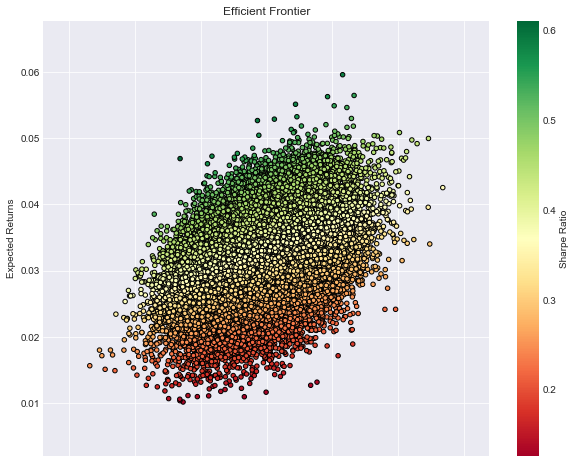

In [53]:
# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

selected = list(table)
# set the number of combinations for imaginary portfolios
num_assets = 33
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(100)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

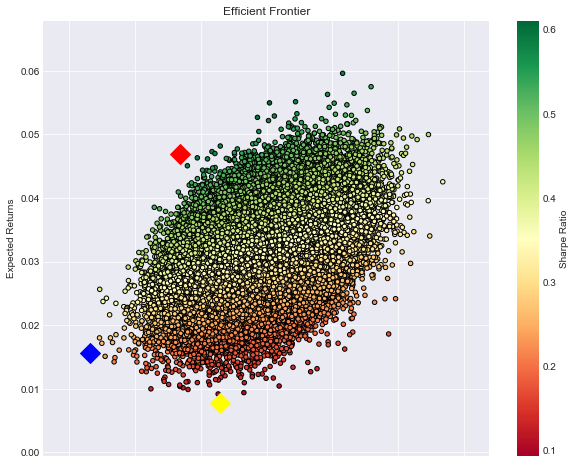

                 30631
Returns       0.015632
Volatility    0.063170
Sharpe Ratio  0.247463
VTSMX Weight  0.004616
VFINX Weight  0.004035
VIVAX Weight  0.044314
VIMSX Weight  0.019351
VMVIX Weight  0.016590
NAESX Weight  0.064816
VISVX Weight  0.016588
VDAIX Weight  0.019541
VGSIX Weight  0.042978
VCSAX Weight  0.010760
VHT Weight    0.003848
VDE Weight    0.009288
VGTSX Weight  0.010308
VTMGX Weight  0.027905
VTRIX Weight  0.027810
VFSVX Weight  0.045093
VEIEX Weight  0.014515
EWX Weight    0.009747
FM Weight     0.025027
VNQI Weight   0.020446
EWD Weight    0.013616
EWA Weight    0.027791
EZA Weight    0.003318
GLD Weight    0.047553
PCRIX Weight  0.050702
EMB Weight    0.051502
PIGLX Weight  0.050528
VICSX Weight  0.032389
VBMFX Weight  0.041557
VIPSX Weight  0.063552
VWITX Weight  0.068379
VFSTX Weight  0.046807
VFISX Weight  0.064731
                 37847
Returns       0.046931
Volatility    0.076878
Sharpe Ratio  0.610459
VTSMX Weight  0.034172
VFINX Weight  0.072988
VIVAX Weigh

In [50]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
min_return = df['Returns'].min()
max_return = df['Returns'].max()
min_sharpe = df['Sharpe Ratio'].min()
# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
sharpe_portfolio_min = df.loc[df['Sharpe Ratio'] == min_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
max_return_port = df.loc[df['Returns'] == max_return]
min_return_port = df.loc[df['Returns'] == min_return]
# plot frontier, max sharpe & min Volatility values, min & max Returns, with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=sharpe_portfolio_min['Volatility'], y=sharpe_portfolio_min['Returns'], c='yellow', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
#plt.scatter(x=max_return_port['Volatility'], y=max_return_port['Returns'], c='yellow', marker='D', s=200 )
#plt.scatter(x=min_return_port['Volatility'], y=min_return_port['Returns'], c='green', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()
print(min_variance_port.T)
print(sharpe_portfolio.T)
print(sharpe_portfolio_min.T)

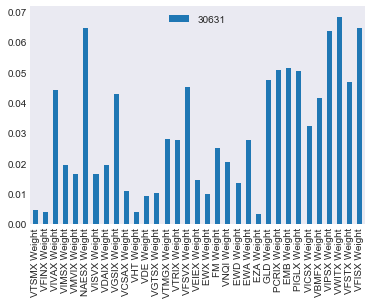

In [58]:
min_variance_weights = min_variance_port.T.iloc[3:]
min_variance_weights.plot.bar()

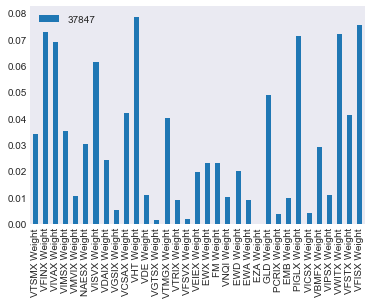

In [62]:
sharpe_portfolio_weights = sharpe_portfolio.T.iloc[3:]
sharpe_portfolio_weights.plot.bar()

In [63]:
min_variance_weights.to_csv('minimumVariance.csv')